### 1A

It is the data of concentration of Carbondioxide between 1958 and 2015
data is shown in the form of integers

The"average"column contains the monthly mean CO2 mole fraction determined  from daily averages. The mole fraction of CO2, expressed as parts per million(ppm) is the number of molecules of CO2 in every one million molecules of dried air(watervaporremoved).


To determine the "trend"  value for each month by removing the seasonal cycle; this result is shown in  the "trend" column.Trend values are linearly interpolated for missing months. The interpolated monthly mean is then the sum of the average seasonal cycle value and the trend value for the missing month.

### 1B

To display my data I can either use a line chart, histogram, or a bar chart 

I will present how much the mean concentration of CO2 has increased over the years with the python library seaborn/or matplotlib, and use a line chart.

Therefore I will be focusing on the 'date' and the 'average' where date will be presented on the x-axis and the average on the y-axis.

# Something similar to the graph below

1C


It will look like this 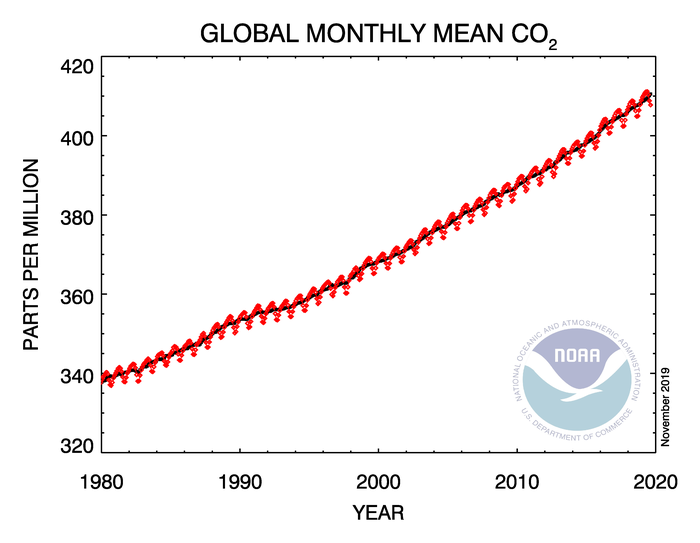


Furhtermore, I will try to visualize the predictions for the mean concentration in the upcoming years based on the data. Therefore I can use other parameters in my data instead of only the 'date' to see if there is a correlation between the other parameters and the increase in the mean concentration of CO2.

Therefore I can inniate other libraries (sckit-learn) to use in my helper functions to run a feature importance test,a regression test, and visualize the results which I will add to my analyze function






### 2A

## I will use the 'average' and 'date' column to present how much the mean concentration of CO2 has increased over the years

In [333]:
from cs103 import *
from typing import NamedTuple, List
import csv
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set()#Provides a better looking layout for the plots
%matplotlib notebook 
#the plots will be interactive(zoom, cursor)


##################
# Data Definitions

CO2_emission = NamedTuple ('CO2_emission', [('date', int), ('average', float)])
# interp. the mean concentration of CO2 data with date,

C1=CO2_emission(1958,315.71)
C2=CO2_emission(1958,317.45)
C3=CO2_emission(1958,317.5)

@typecheck
def fn_for_co2_concent(c: CO2_emission) -> ...: # template based on compound 
    return ...(c.date, c.average)

# List[CO2_emission]
# interp. a list of Consumed

LOC0 = []
LOC1 = [C1, C2]

@typecheck
def fn_for_loc(loc: List[CO2_emission]) -> ...:# template based on arbitrary-sized 
    # description of the acc                           # and the reference rule 
    acc = ... # type ...
    for c in loc:
        acc = ...(acc, fn_for_co2_concent(c))
    
    return ...(acc)

### Read Function

In [334]:
###########
# Functions
@typecheck
def read(filename: str) -> List[CO2_emission]:
    """    
    reads information from the specified file and returns the mean concentration of CO2 with dates
    """
    #return []  #stub
    # Template from HtDAP
    # loc contains the result so far
    loc = [] # type: List[CO2_emission]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) #Skips the header
        
        for row in reader:
            # Store only the 'date' and the 'average' row
            #parse the inputs to change their type
            c = CO2_emission(parse_int(row[0]),parse_float(row[3]))
            loc.append(c)
    
    return loc

# Begin testing
start_testing()

# Examples and tests for read
expect((read('co2_concentration_test1.csv')),[CO2_emission(date=1958, average=315.71),
                                              CO2_emission(date=1958, average=317.45 ),
                                              CO2_emission(date=1958, average=317.5)])

expect((read('co2_concentration_test2.csv')), [CO2_emission(date=1958,average=-99.99),
                                               CO2_emission(date=1958, average=315.86),
                                               CO2_emission(date=1958, average=314.93)])

# show testing summary
summary()

2 of 2 tests passed


In [335]:
@typecheck
def get_date(loc:List[CO2_emission])-> List[int]:
    ''''
    returns a list of date values from loc
    '''''
    #template based on arbitary sized  
       
    date=[] #return List[int]
    for c in loc: 
        date.append(c.date)
    return date

@typecheck
def get_average(loc:List[CO2_emission])-> List[float]:
    ''''
    returns a list of average CO2 emission values from loc
    '''''
    #template based on arbitary sized  
       
    average=[] #List[float]
    
    for c in loc: 
        average.append(c.average)
    return average

@typecheck
def plt(loc:List[CO2_emission]) -> None: #Analyze Function
    ''''
    returns a scatter plot for average CO2 emission throughout the years by using the values from loc
    '''''
    #template based on arbitary sized data and reference rule 
    pyplot.figure(figsize=(10,10)) #setting a larger layout for plot
    
    #the movement and correlation of CO2 emission can be observed from the scatter plot

    pyplot.scatter(get_date(loc), get_average(loc), edgecolors='r',alpha=0.9,label='avg. C02') 
    
    pyplot.xlabel('Dates')
    pyplot.ylabel('Average CO2 Emission')
    pyplot.legend() #return None 

    return pyplot.show()

@typecheck
def dictionary(loc:List[CO2_emission])-> dict: #Later going to be referenced to create a dataframe
    ''''
    returns a dictionary with keys  date and average, and stores the corresponding values
    '''''
    #template based on arbitary sized data and reference rule 
    #return dict 
        
    dic={"date" :get_date(loc),
        "average" : get_average(loc)}
    
    return dic


<IPython.core.display.Javascript object>


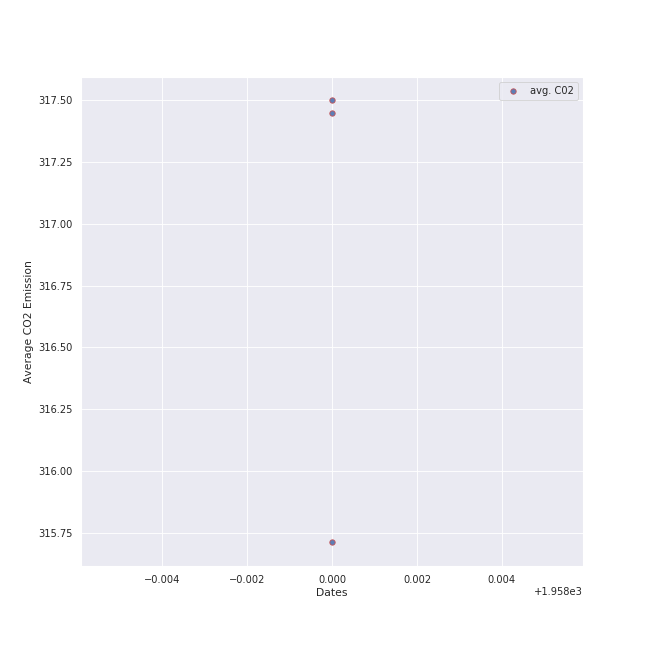

<IPython.core.display.Javascript object>


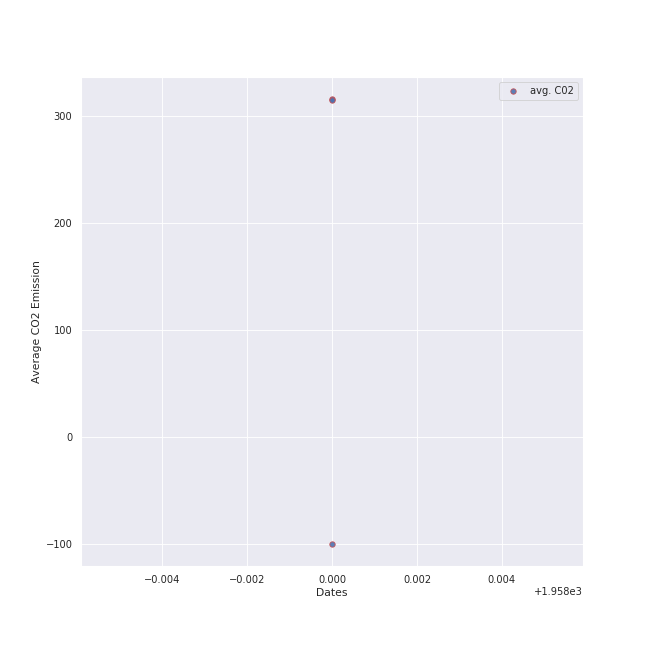

<IPython.core.display.Javascript object>


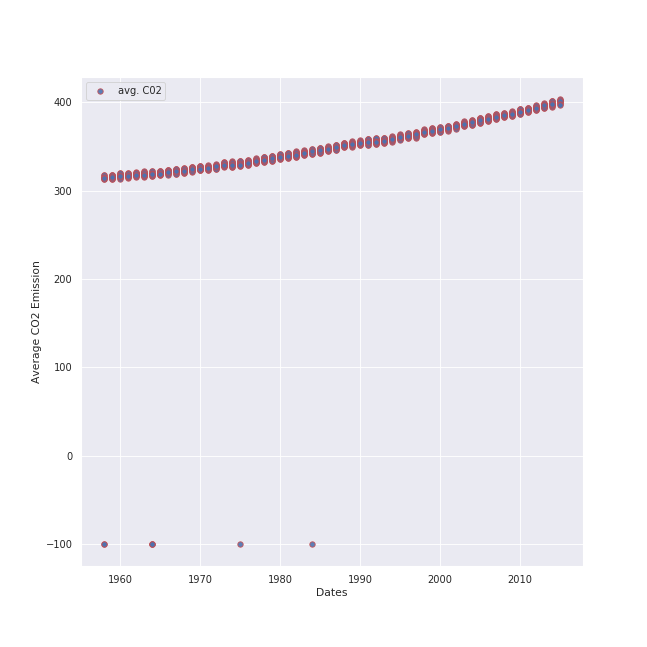

3 of 3 tests passed


In [340]:
#Define main function

def main(filename:str)-> None:
    ''''
    reads the csv file and returns a scatter plot for average CO2 emission throughout the years 
    '''''
    #template based on arbitray sized data and reference rule(2 times)
    # return None
    return (plt(read(filename)))

# Begin testing
start_testing()

# Examples and tests for main
expect(main('co2_concentration_test1.csv'),None)
expect(main('co2_concentration_test2.csv'),None)
expect(main('co2_concentration.csv'),None)

summary()


<IPython.core.display.Javascript object>


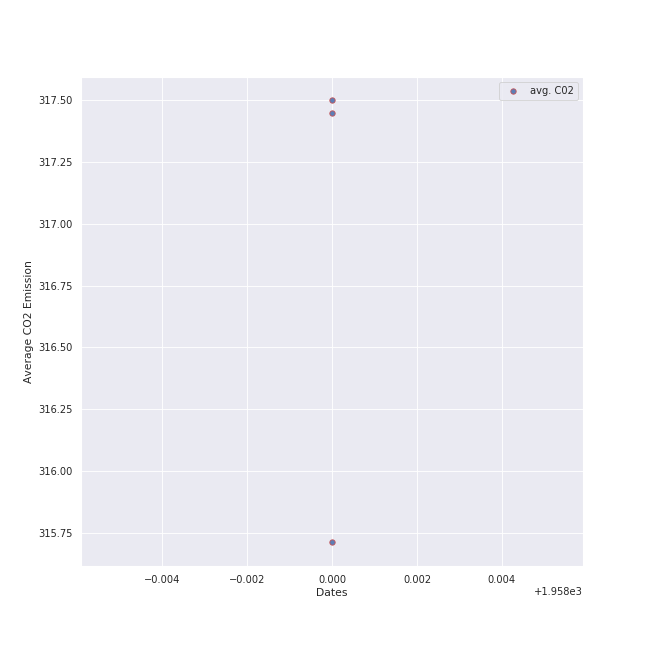

<IPython.core.display.Javascript object>


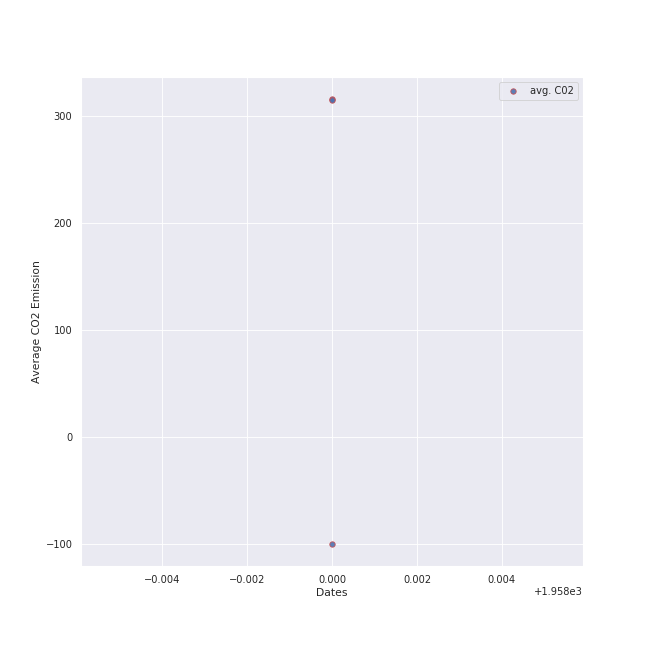

<IPython.core.display.Javascript object>


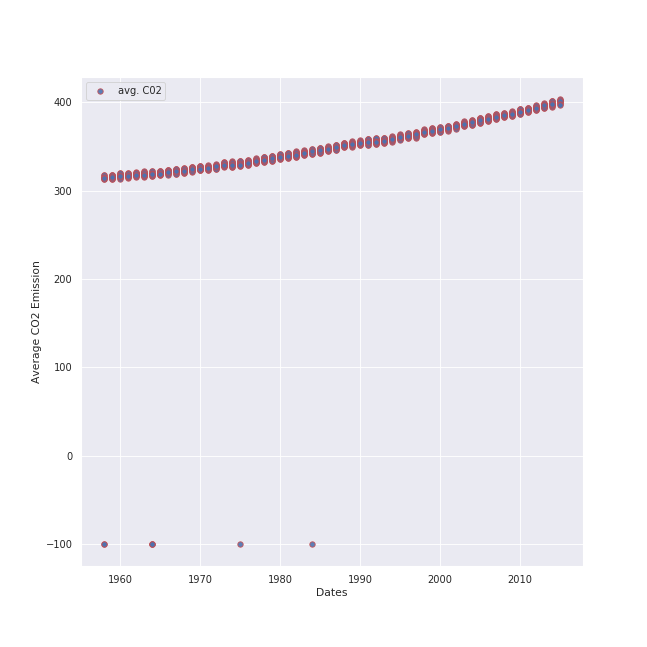

9 of 9 tests passed


In [320]:
# Begin testing
start_testing()

# Examples and tests for get_average
expect(get_date(read('co2_concentration_test1.csv')),[1958, 1958, 1958])
expect(get_date(read('co2_concentration_test2.csv')),[1958, 1958, 1958])

# Examples and tests for get_average
expect(get_average(read('co2_concentration_test1.csv')),[315.71, 317.45, 317.5])
expect(get_average(read('co2_concentration_test2.csv')),[-99.99, 315.86, 314.93])

# Examples and tests for plt
expect(plt(read('co2_concentration_test1.csv')),None)
expect(plt(read('co2_concentration_test2.csv')),None)
expect(plt(read('co2_concentration.csv')),None)

# Examples and tests for dictionary
expect(dictionary(read('co2_concentration_test1.csv')),{'date': [1958, 1958, 1958], 
                                                        'average': [315.71, 317.45, 317.5]})
expect(dictionary(read('co2_concentration_test2.csv')),{'date': [1958, 1958, 1958], 
                                                        'average': [-99.99, 315.86, 314.93]})
#Show results
summary()

# Option 2
### Here I included everything into my data definition and and pass the parameters into my read function where it does not do any filtering

In [322]:
from cs103 import *
from typing import NamedTuple, List
import csv
import os
import seaborn as sns
from matplotlib import pyplot

##################
# Data Definitions

CO2_emission = NamedTuple ('CO2_emission', [('date', int), 
                                    ('season_corr', float),
                                    ('decimal', int), ('average', float),
                                    ('interpolated',float),
                                    ('trend',float),
                                    ('days',float)])
# interp. the mean concentration of CO2 data with date, decimal, seasonal correlation, average, interpolated, trend and 
#        number of days
C1=CO2_emission(1958,3,1958.208,315.71,315.71,314.62,-1)
C2=CO2_emission(1958,4,1958.292,317.45,317.45,315.29,-1)
C3=CO2_emission(1958,5,1958.375,317.5,317.5,314.71,-1)

@typecheck
def fn_for_co2_concent(c: CO2_emission) -> ...: # template based on compound 
    return ...(c.date,c.season_corr, c.decimal, c.average, c.interpolated, c.trend,
               c.days)

# List[CO2_emission]
# interp. a list of CO2_emission in terms of date, season correlation, decimal, average, interpolated, and trend

LOC0 = []
LOC1 = [C1, C2,C3]

@typecheck
def fn_for_loc(loc: List[CO2_emission]) -> ...:# template based on arbitrary-sized 
    # description of the acc                           # and the reference rule 
    acc = ... # type ...
    for c in loc:
        acc = ...(acc, fn_for_co2_concent(c))
    
    return ...(acc)


###########
# Functions

@typecheck
def read(filename: str) -> List[CO2_emission]:
    """    
    reads information from the specified file and returns the mean concentration of CO2 data with date, 
    decimal, seasonal correlation, average, interpolated, trend and number of days
    """
    #return []  #stub
    # Template from HtDAP
    # loc contains the result so far
    loc = [] # type: List[CO2_emission]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) #Skips the header
        
        for row in reader:
            # Store all the rows
                        # Store only the 'date' and the 'average' row
            #parse the inputs to change their type
            c = CO2_emission(parse_int(row[0]),parse_float(row[1]),parse_float(row[2]),
                         parse_float(row[3]),parse_float(row[4]), parse_float(row[5]),
                         parse_float(row[6]))
            loc.append(c)
    
    return loc


# Begin testing
start_testing()

# Examples and tests for read
expect((read('co2_concentration_test1.csv')),[CO2_emission(date=1958, season_corr=3, decimal=1958.208, average=315.71, interpolated=315.71, trend=314.62, days=-1),
 CO2_emission(date=1958, season_corr=4, decimal=1958.292, average=317.45, interpolated=317.45, trend=315.29, days=-1),
 CO2_emission(date=1958, season_corr=5, decimal=1958.375, average=317.5, interpolated=317.5, trend=314.71, days=-1)])
expect((read('co2_concentration_test2.csv')), [CO2_emission(date=1958, season_corr=6, decimal=1958.458, average=-99.99, interpolated=317.1, trend=314.85, days=-1),
 CO2_emission(date=1958, season_corr=7, decimal=1958.542, average=315.86, interpolated=315.86, trend=314.98, days=-1),
 CO2_emission(date=1958, season_corr=8, decimal=1958.625, average=314.93, interpolated=314.93, trend=315.94, days=-1)])

# show testing summary
summary()

2 of 2 tests passed


### ***Helper Functions***

In [323]:


@typecheck
def get_decimal(loc:List[CO2_emission])-> List[float]:
    ''''
    returns a list of decimals  from loc
    '''''
    #template based on arbitary sized  
       
    decimal=[] #return List[float]
    
    for c in loc: 
        decimal.append(c.decimal)
    return decimal

@typecheck
def get_date(loc:List[CO2_emission])-> List[int]:
    ''''
    returns a list of date values from loc
    '''''
    #template based on arbitary sized  

    date=[] #return List[int]
    for c in loc: 
        date.append(c.date)
    return date

@typecheck
def get_season(loc:List[CO2_emission])-> List[float]:
    ''''
    returns a list of season correlation values  from loc
    '''''
    #template based on arbitary sized  
       
    season=[] #return List[float]
    
    for c in loc:
        season.append(c.season_corr)
    return season

@typecheck
def get_interpolated(loc:List[CO2_emission])-> List[float]:
    ''''
    returns a list of interpolated values from loc
    '''''
    #template based on arbitary sized  
       
    interpolated=[] #return List[float]
    
    for c in loc: 
        interpolated.append(c.interpolated)
    return interpolated

@typecheck
def get_trend(loc:List[CO2_emission])-> List[float]:
    ''''
    returns a list of trend values  from loc
    '''''
    #template based on arbitary sized  
       
    trend=[] #return List[float]
    
    for c in loc:
        trend.append(c.trend)
        
    return trend


@typecheck
def get_average(loc:List[CO2_emission])-> List[float]:
    ''''
    returns a list of average CO2 emission values from loc
    '''''
    #template based on arbitary sized 
    
    average=[] #List[float]
    for c in loc: 
        average.append(c.average)
        
    return average

@typecheck
def get_days(loc:List[CO2_emission])-> List[float]:
    ''''
    returns a list of day values loc
    '''''
    #template based on arbitary sized  
       
    days=[] #List[float]
    for c in loc:
        days.append(c.days)
        
    return days

@typecheck
def plt(loc:List[CO2_emission]) -> None:
    ''''
    returns a plot for each x values; average, decimal, interpolated,trend and days withy values of date from loc
    each plot is represented with a diffrent colour to see the correlation to make assumptions on causation
    '''''
    #template based on arbitary sized data and reference rule 
    pyplot.figure(figsize=(10,10))
    pyplot.plot(get_date(loc),get_average(loc), marker='o', color='skyblue', linewidth=3,alpha=0.3,label='avg. C02')
    pyplot.plot( get_date(loc),get_decimal(loc),  marker='', color='darkblue', linewidth=1, alpha=.7,label='decimal')
    pyplot.plot( get_date(loc),get_interpolated(loc),  marker='', color='pink', linewidth=2,alpha=2, label='interpolated')
    pyplot.plot( get_date(loc), get_trend(loc),  marker='', color='green', linewidth=1, alpha=0.5,label='trend')
    pyplot.plot( get_date(loc), get_days(loc),  marker='', color='gray', linewidth=1, alpha=.5,label='days')

    pyplot.legend() #return None

    return pyplot.show()

<IPython.core.display.Javascript object>


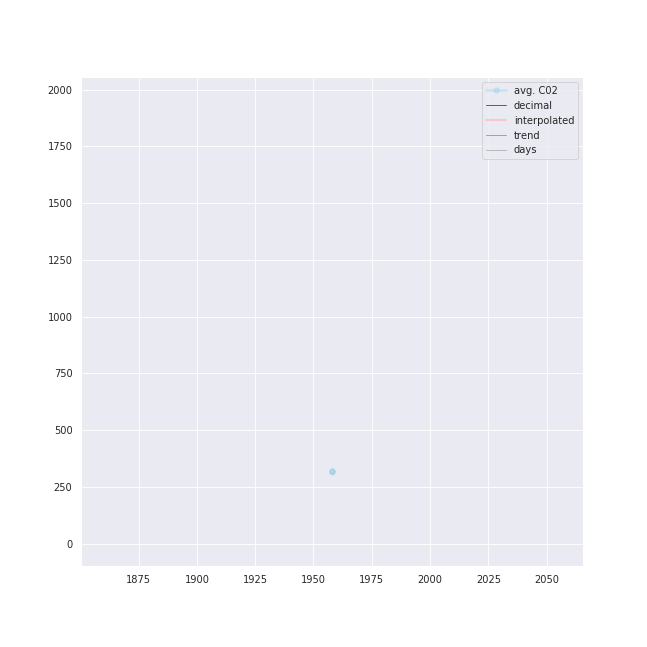

<IPython.core.display.Javascript object>


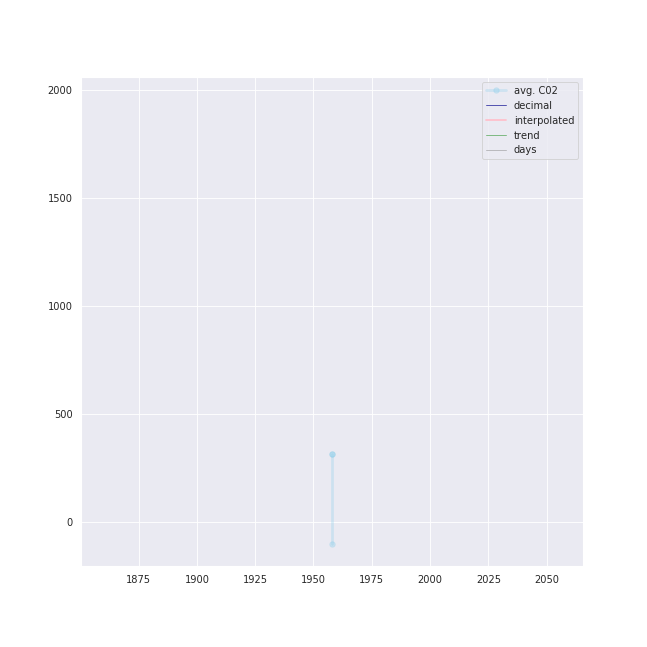

<IPython.core.display.Javascript object>


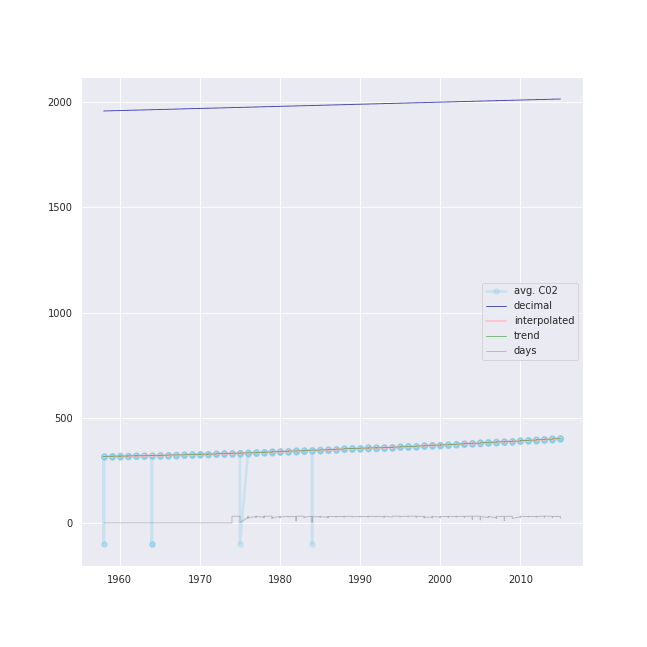

3 of 3 tests passed


In [324]:
#Define main function

def main(filename:str)-> None:
    ''''
    returns a plot for each x values; average, decimal, interpolated,trend and days withy values of date from loc
    each plot is represented with a diffrent colour to see the correlation to make assumptions on causation
    '''''
    #template based on arbitray sized data and reference rule(2 times)
    # return None
    return plt(read(filename))

# Begin testing
start_testing()

# Examples and tests for main
expect(main('co2_concentration_test1.csv'),None)
expect(main('co2_concentration_test2.csv'),None)
expect(main('co2_concentration.csv'),None)

summary()


### ***Tests for helper functions***

<IPython.core.display.Javascript object>


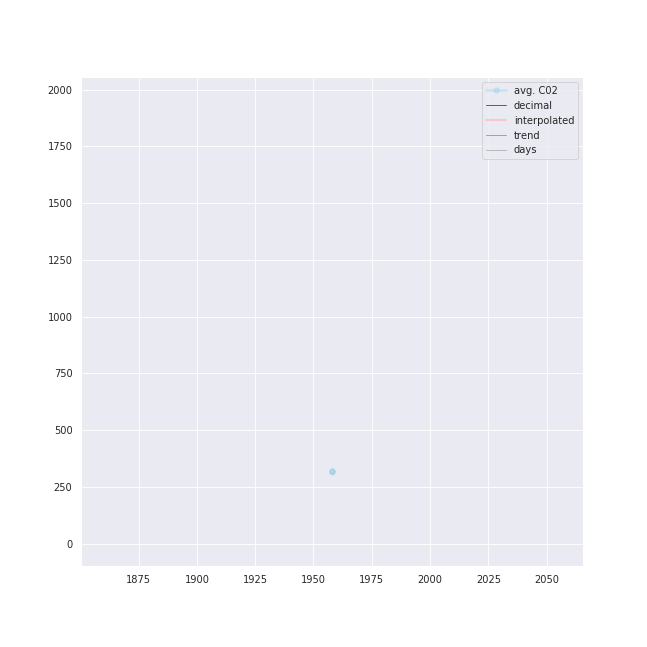

<IPython.core.display.Javascript object>


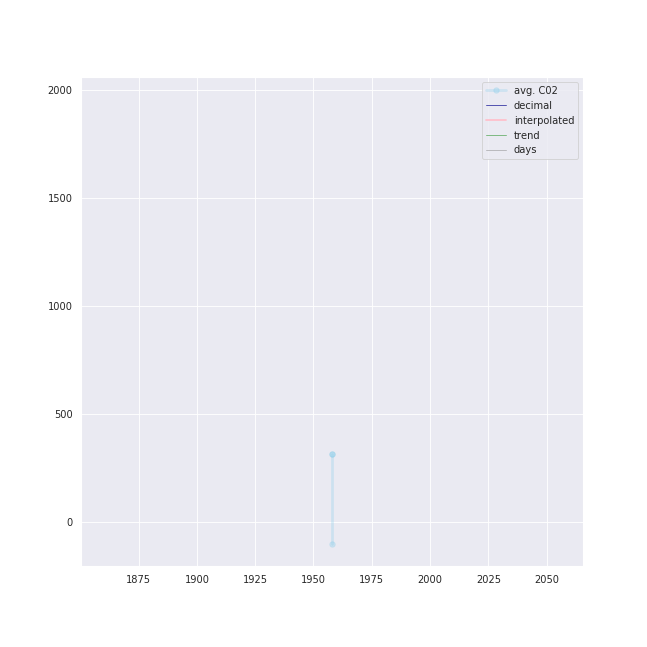

16 of 16 tests passed


In [311]:
# Begin testing
start_testing()

# Examples and tests for get_date
expect(get_date(read('co2_concentration_test1.csv')),[1958, 1958, 1958])
expect(get_date(read('co2_concentration_test2.csv')),[1958, 1958, 1958])

# Examples and tests for get_interpolated
expect(get_interpolated(read('co2_concentration_test1.csv')),[315.71, 317.45, 317.5])
expect(get_interpolated(read('co2_concentration_test2.csv')),[317.1, 315.86, 314.93])

# Examples and tests for get_season
expect(get_season(read('co2_concentration_test1.csv')),[3.0, 4.0, 5.0])
expect(get_season(read('co2_concentration_test2.csv')),[6.0, 7.0, 8.0])

# Examples and tests for get_trend
expect(get_trend(read('co2_concentration_test1.csv')),[314.62, 315.29, 314.71])
expect(get_trend(read('co2_concentration_test2.csv')),[314.85, 314.98, 315.94])

# Examples and tests for get_days
expect(get_days(read('co2_concentration_test1.csv')),[-1.0, -1.0, -1.0])
expect(get_days(read('co2_concentration_test2.csv')),[-1.0, -1.0, -1.0])

# Examples and tests for get_decimal
expect(get_decimal(read('co2_concentration_test1.csv')),[1958.208, 1958.292, 1958.375])
expect(get_decimal(read('co2_concentration_test2.csv')),[1958.458, 1958.542, 1958.625])


# Examples and tests for get_average
expect(get_average(read('co2_concentration_test1.csv')),[315.71, 317.45, 317.5])
expect(get_average(read('co2_concentration_test2.csv')),[-99.99, 315.86, 314.93])

# Examples and tests for plt
expect(plt(read('co2_concentration_test1.csv')),None)
expect(plt(read('co2_concentration_test2.csv')),None)

summary()

## *Further Alternatives*...

 **We are going to use the dictionary function we defined earlier to illustrate one way to convert csv first to a dictionary and then to a dataframe**

In [325]:
import pandas as pd
from xgboost import XGBRegressor, XGBClassifier,plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import numpy as np

@typecheck
def dictionary(loc:List[Consumed])-> dict:
    ''''
    returns a dictionary with keys date,decimal,interpolated,trend,days average and stores the corrensponding
    values from loc
    '''''
    #template based on arbitary sized data and reference rule  
    dic={"date" :get_date(loc),
        "season_corr" :get_season(loc),
        "decimal" :get_decimal(loc),
        "average" : get_average(loc),
        "interpolated" :get_interpolated(loc),
        "trend" : get_trend(loc),
        "days" : get_days(loc)}  #return dict 
    
    return dic

# Examples and tests for dictionary
expect(dictionary(read('co2_concentration_test1.csv')),{'date': [1958, 1958, 1958],
                                                        'season_corr': [3.0, 4.0, 5.0],
                                                        'decimal': [1958.208, 1958.292, 1958.375],
                                                        'average': [315.71, 317.45, 317.5],
                                                        'interpolated': [315.71, 317.45, 317.5],
                                                        'trend': [314.62, 315.29, 314.71],
                                                        'days': [-1.0, -1.0, -1.0]})
expect(dictionary(read('co2_concentration_test2.csv')),{'date': [1958, 1958, 1958],
                                                        'season_corr': [6.0, 7.0, 8.0],
                                                        'decimal': [1958.458, 1958.542, 1958.625],
                                                        'average': [-99.99, 315.86, 314.93],
                                                        'interpolated': [317.1, 315.86, 314.93],
                                                        'trend': [314.85, 314.98, 315.94],
                                                        'days': [-1.0, -1.0, -1.0]})

#Show results
summary()

2 of 2 tests passed


In [331]:
#Converting dictionary to a dataframe
@typecheck
def df_from_dict(filename:str)-> object:
    ''''' 
    returns a dataframe with dictionary keys set as the index and their values set on the rows of the dataframe
    '''''
    #template based on arbitray sized data and reference rule
    dic=dictionary(read(filename))
    df=pd.DataFrame.from_dict(dic)
    df = df[df.average != -99.99]
    df=df[df.days != -1]
    #return pandas.core.frame.DataFrame
    return df


##Reading the csv file with pandas library
@typecheck
def datafram(filename: str)-> object:
    ''''' 
    reads the csv file and returns a dataframe with the header of the file set as the index of the dataframe
    '''''
    #template based on arbitray sized data and reference rule
    df=pd.read_csv(filename)
    df = df[df.average != -99.99]
    # return pandas.core.frame.DataFrame
    return df[df.days != -1]


[07:05:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


<IPython.core.display.Javascript object>


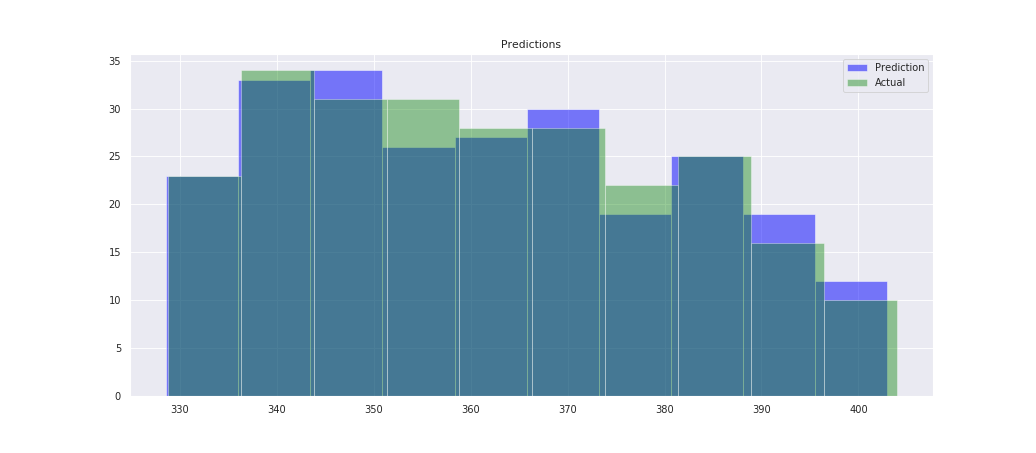

<IPython.core.display.Javascript object>


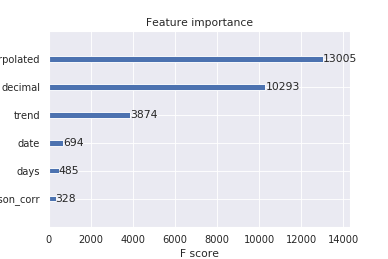

coefficient of determination: 0.999603574904806
1 of 1 tests passed


In [314]:
@typecheck
def predict(filename:str)-> tuple:
    
    df= df_from_dict(filename)
    X=df.drop("average", axis=1)
    y=df["average"]
    
    #TRAINING THE MODEL
    # I will use Extreme Gradient Boosting model because it works very well on tabular data
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.50)
   
    # Create a parameters grid to optimize the regressor
    # In choose a regularizion and best parameters for the model,these parameters will 
    # Set the number of estimators in the model. 
    # More the number of estimators longer it would take to train the model
   
    param_grid = {
    "n_estimators": [100, 120, 140, 150],
    "base_score": [0.3, 0.4, 0.5, 0.6]
}
    clf_gs = RandomizedSearchCV(clf, param_grid, cv=5, n_iter=3)
    
    #Extreme Gradient Boosting models are not prone to overfitting. 
    # Furthermore, I used Randomized Grid Search to search for the optimum paramters.
    
    best_clf = XGBRegressor(n_estimators=res.best_params_['n_estimators'], 
                            base_score=res.best_params_['base_score'])
    #Fit the model
    best_clf.fit(X_train, y_train)
    
    y_pred = best_clf.predict(X_test)
    
    r_sq = best_clf.score(X, y) #Shows the accuracy of our predictor closer to 1, higher the accuracy
    
    #return None 
    pyplot.figure(figsize=(16, 7))
    pyplot.hist(y_pred, color="blue", alpha=0.5, label="Prediction")
    pyplot.hist( y_test,color="green", alpha=0.4, label="Actual")
    pyplot.legend()
    pyplot.title("Predictions")
    
    #Create another model for classifying the keys by their relevance to the dependent variable
    model = XGBClassifier()
    model.fit(X, y)
    
    # PLOT FEATURE IMPORTANCE
    
    #Feature importance scores can be used for feature selection
    #Score indicates how useful each feature is within the model 
    #More an attribute is used to predict,the higher its relative importance
    
    #return tuple(None,None) since one .show() built in function would call the 2 graphs simultaneously 
    plot_importance(model)
    return (pyplot.show(), print('coefficient of determination:', r_sq))

#Begin Test
start_testing()

expect(predict('co2_concentration.csv'),(None,None))

#Show Results
summary()

## As we can see the distributions are almost the same and coefficient of determinations is almost 1 which tells us the model is accurate